- want cooccurance plots for each MCM
- want want to cluster them etc. see notes
- want them for same MCM but different sizes

In [1]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

sys.path.append("../")
import src.plot as myplot
import seaborn as sns


In [2]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/classifier/bin/../src/plot.py'>

In [3]:
# lets first load some example MCM
samples_path = "../OUTPUT/sample_sizes"
fname = "MCMs.json"
# sample_sizes = [10,100,500,1000,5421]
# sample_sizes = np.geomspace(10,5421, 10,dtype=int)
sample_sizes = np.append(np.arange(10, 5421, 100), 5421)
samples = {}
for sample_size in sample_sizes:

        with open(os.path.join(samples_path,str(sample_size), fname), "r") as f:
                samples[sample_size] = json.load(f)

In [4]:
sample_sizes

array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510, 1610, 1710, 1810, 1910, 2010, 2110,
       2210, 2310, 2410, 2510, 2610, 2710, 2810, 2910, 3010, 3110, 3210,
       3310, 3410, 3510, 3610, 3710, 3810, 3910, 4010, 4110, 4210, 4310,
       4410, 4510, 4610, 4710, 4810, 4910, 5010, 5110, 5210, 5310, 5410,
       5421])

In [6]:
# Cooccurance matrix for MCM 0
cmap = myplot.cmap_to_gray("Black", reverse=True)
mcm_0 = [myplot.create_cooccurance_matrix(samples[i][0]) for i in samples]


##### find the rows/pixels that do not have any community members in their community that they will have in the final community

- Note: test MCM is for digit 0



In [114]:

convergence = []
for i, mcm_s in enumerate(mcm_0):
    a = mcm_s+mcm_0[-1]
    np.fill_diagonal(a, 0)
    convergence.append(np.where(np.all(a != 2, axis=1))[0])





In [120]:
convergence[0]

array([  0,   1,   2,   3,   4,   7,   8,   9,  10,  11,  12,  13,  14,
        16,  21,  22,  23,  24,  26,  27,  30,  33,  34,  36,  39,  40,
        43,  44,  45,  46,  51,  54,  55,  56,  57,  60,  63,  64,  65,
        66,  74,  75,  76,  77,  81,  82,  84,  85,  86,  87,  88,  91,
        92,  95,  96,  98,  99, 102, 105, 106, 114, 117, 118, 119, 120])

single run


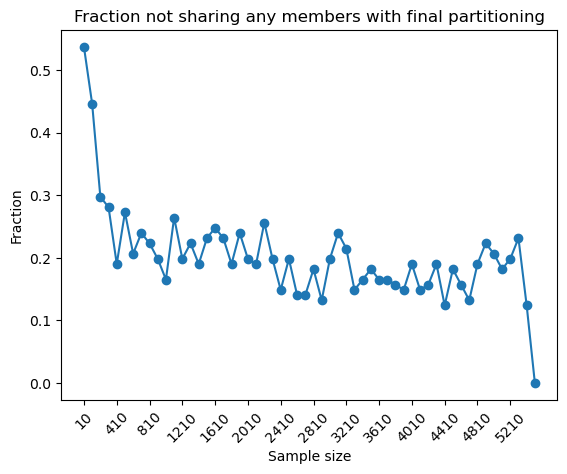

In [153]:
print("single run")
curv = [len(i)/121 for i in convergence]

plt.title("Fraction not sharing any members with final partitioning")
plt.ylabel("Fraction")
plt.xlabel("Sample size")
plt.scatter(np.arange(len(curv)), curv)
plt.plot(curv)
plt.xticks(np.arange(len(curv))[::4], sample_sizes[::4], rotation=45) 
plt.show()

In [133]:


wrong_pixels = convergence[-3]

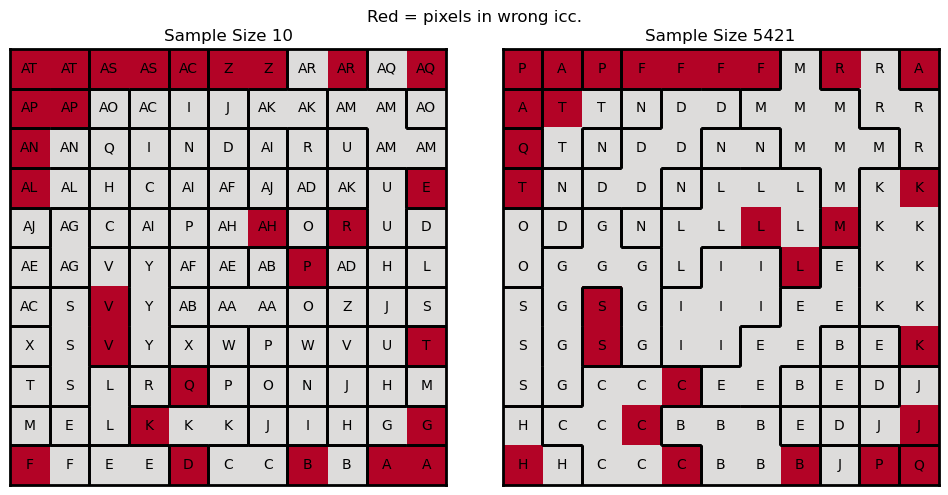

In [134]:
val = np.zeros(121)
val[wrong_pixels] = 1
val = val.reshape((11,11))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))


plt.suptitle("Red = pixels in wrong icc.")
comms_0 = samples[10][0]
comms_0 = myplot.generate_icc_comms_map(comms_0)
axs[0].set_title('Sample Size 10')
im = myplot.partition_map(axs[0], val, myplot.int_to_letters(comms_0), myplot.find_borders(comms_0), cbar=False)


comms_0 = samples[5421][0]
comms_0 = myplot.generate_icc_comms_map(comms_0)
axs[1].set_title('Sample Size 5421')
im = myplot.partition_map(axs[1], val, myplot.int_to_letters(comms_0), myplot.find_borders(comms_0), cbar=False)

plt.tight_layout()
plt.show()


Fraction of pixels together in a group that will be in a (possibly differently labeled) group later as well. 

- in the co-occurance matrix, this means that the row will have not a single overlapping pixel. Then, that grouping means that none of the pixels that are together are correct

which communities are wrong in the small dataset compared to the big one. They disappear as the sampe sizes get larger.
that is which pixels are incorrectly grouped
that is which pixels are in an group that should not be together later

Check if all its member pixels are present in any community of the large dataset. 

------------------------------

In [ ]:
raise KeyboardInterrupt

In [10]:
test_mcm = test_MCMs[0]
test_mcm = np.genfromtxt(test_mcm,delimiter=1,dtype=int)


idx_pairs = np.argwhere(test_mcm==1).T
cooocurance_matrix = np.zeros((121,121))

cooocurance_matrix[idx_pairs[0],idx_pairs[1]] = 1
cooocurance_matrix[idx_pairs[1],idx_pairs[0]] = 1

plt.imshow(cooocurance_matrix)

mcm = np.array(["11000", "00111"],dtype=str)

mcm

NameError: name 'test_MCMs' is not defined

In [ ]:
# my_sum = myplot.do_cluster(np.sum(mcm_0,axis=0), mcm_0[-1])
# g = sns.clustermap(my_sum, cmap=cmap, linewidth=1,
#                     edgecolor="white", 
#                     dendrogram_ratio=(1e-10,1e-10), # This line 
#                     figsize=(15,15),
#                     xticklabels=False,
#                     yticklabels=False,
#                     row_cluster=False,
#                     col_cluster=False,
#                     cbar=True,
#                     cbar_pos=(0.85, 0.8, 0.07, 0.15)  # Set the colorbar position to the top right corner
#                     )
# # g.ax_row_dendrogram.remove()
# # g.ax_col_dendrogram.remove()
# # g.ax_heatmap.set_facecolor("gray")

# # g.cax.set_visible(False)
# # g.ax_cbar.set_title("")

# comms_test = myplot.do_cluster(mcm_0[-1],mcm_0[-1])
# borders = myplot.find_borders(comms_test)
# myplot.draw_all_borders(borders,ax=g.ax_heatmap,offset=(.5,.5))

# g.ax_cbar.tick_params(axis='x', length=10)
# for spine in g.ax_cbar.spines:
#     g.ax_cbar.spines[spine].set_color('black')
#     g.ax_cbar.spines[spine].set_linewidth(2)

# plt.savefig("../figures/paper_cooccurance.png")
# calcualte overlap between sample cluastering and final clustering
# -> how many are already in the right cluster
# mcm_0


# res = [np.sum(np.logical_and(i, mcm_0[-1])) for i in mcm_0]
# res = [i/np.sum(mcm_0[-1]) for i in res]
# plt.plot(sample_sizes, res)
# plt.xlabel('Sample Size')
# plt.ylabel('% Overlap')
# plt.title("% Overlap in Co-occurance plots with full sample MCM")
# plt.grid(True)
# plt.show()